In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [20]:
import pandas as pd

df = pd.read_csv('/content/Mall_Customers.csv')
display(df.head())
print("\nDataset Info:")
print(df.info())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [15]:
from sklearn.preprocessing import StandardScaler

# Select the numerical features for scaling
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
features_df = df[features]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)

print("Scaled Features Shape:", scaled_features.shape)

Scaled Features Shape: (200, 3)


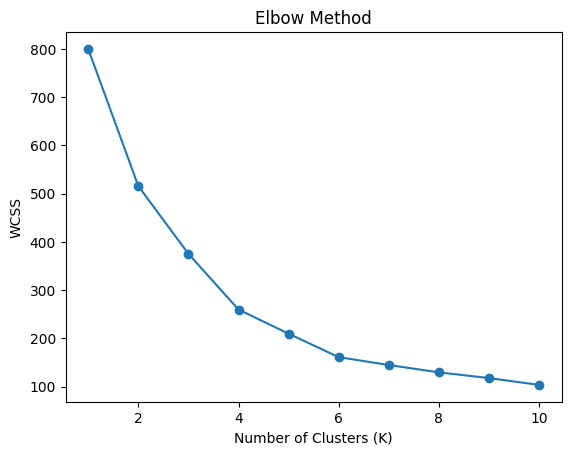

In [16]:
wcss = []  # Within Cluster Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot Elbow Graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.show()

In [17]:
optimal_k = 3   # Change based on elbow graph

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to dataset
df['Cluster'] = cluster_labels

print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        0  
1        0  
2        0  
3        0  
4        0  


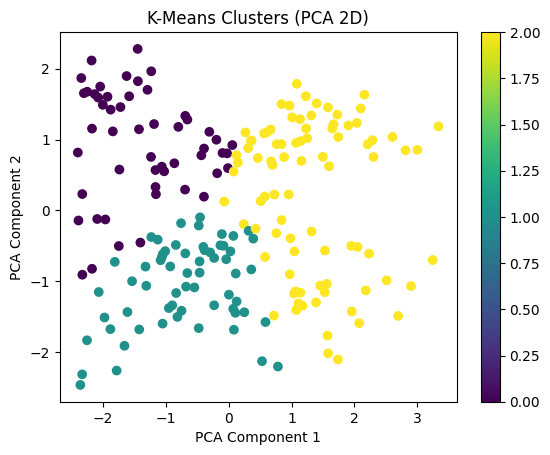

In [18]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.scatter(pca_data[:, 0], pca_data[:, 1],
            c=cluster_labels, cmap='viridis')

plt.title("K-Means Clusters (PCA 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar()
plt.show()

In [19]:
score = silhouette_score(scaled_data, cluster_labels)
print("Silhouette Score:", score)

Silhouette Score: 0.33627250175154105
